**Problem Statement:**

With the exponential growth of textual data across various domains, the need for automatic text summarization has become critical. Extractive text summarization aims to identify and extract the most important sentences or phrases from a document, thereby producing a shorter version that retains the essential information. While traditional methods like frequency-based or heuristic approaches have been used, there is a growing interest in leveraging machine learning techniques, particularly deep learning models, to improve summarization quality. This project aims to develop an efficient and effective extractive text summarization system using Restricted Boltzmann Machines (RBMs) that can generate concise, coherent, and informative summaries from lengthy documents.

**The problem statement draws inspiration from the research paper available at
the following link:**
https://ijsart.com/Content/PDFDocuments/IJSARTV4I623858.pdf

**We utilized the BBC News Summary Dataset to develop our RBM model for extractive text summarization. This dataset contains over 2,500 files, each paired with an abstractive summary. Below is an image of a sample file demonstrating its initial format:**

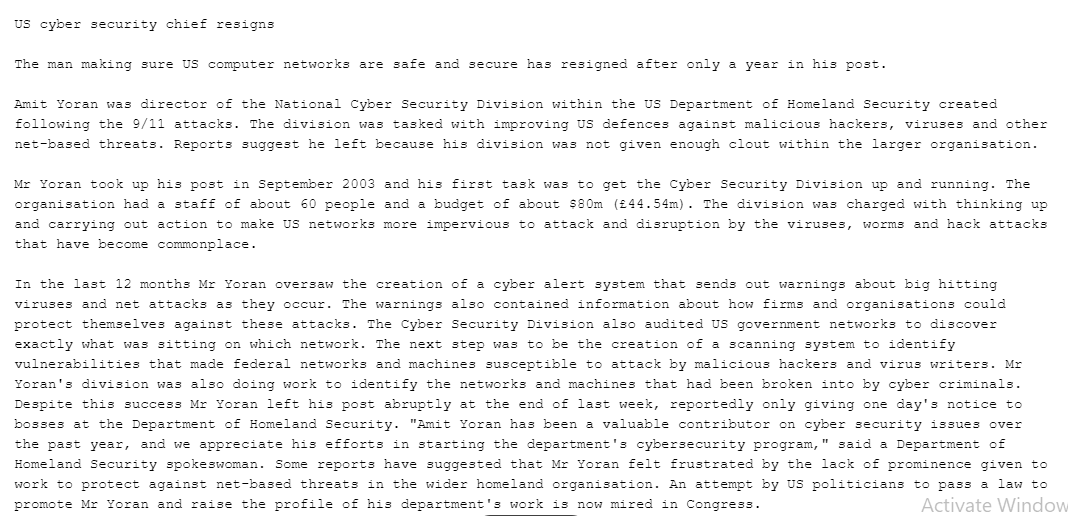

**The first line serves as the heading of the text file, while the paragraph below contains the actual content.**

General preprocessing of a text file involves the following steps:

- Stemming / Lemmatization
- Stop words Removal
- Punctuation Removal

**However, for extractive text summarization, these preprocessing steps cannot be applied as they may affect the quality of the summary. Instead, we add `<t></t>` tags before and after the title to distinguish it from the rest of the file. This distinction is useful for computing title similarity later on.**

The following code demonstrates how to modify the initial text file and save it in a new folder called **"Preprocessed_Files".**

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

Extracting Zip File:

In [ ]:
import zipfile

local_zip = '/content/drive/My Drive/BBC.zip'

with zipfile.ZipFile(local_zip, 'r') as zip_ref:
    zip_ref.extractall('/content/drive/My Drive/zip_ref')

print("Extraction complete.")


Extraction complete.


In [ ]:
%cd "/content/drive/My Drive/zip_ref/BBC News Summary/News Articles"


/content/drive/My Drive/zip_ref/BBC News Summary/News Articles


**The below code traverses through the directory containing text files, adds `<t>` tags before the title of each file, and then writes the modified content to corresponding files in another directory:**

In [ ]:
import os

def add_title_tags(file_path):
    with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
        lines = file.readlines()

    for i, line in enumerate(lines):
        if line.strip():
            lines[i] = f"<t>{line.strip()}</t>\n"
            break

    return lines

def process_directory(input_directory, output_directory):
    for subdir, _, files in os.walk(input_directory):
        for file in files:
            if file.endswith('.txt'):
                input_file_path = os.path.join(subdir, file)
                output_file_path = os.path.join(output_directory, os.path.relpath(input_file_path, input_directory))
                output_file_dir = os.path.dirname(output_file_path)

                os.makedirs(output_file_dir, exist_ok=True)

                with open(output_file_path, 'w', encoding='utf-8') as output_file:
                    output_file.writelines(add_title_tags(input_file_path))

input_directory = '/content/drive/My Drive/zip_ref/BBC News Summary/News Articles'
output_directory = '/content/drive/My Drive/zip_ref/BBC News Summary/preprocessed_files'

process_directory(input_directory, output_directory)


**The preprocessed text file appears as follows:**
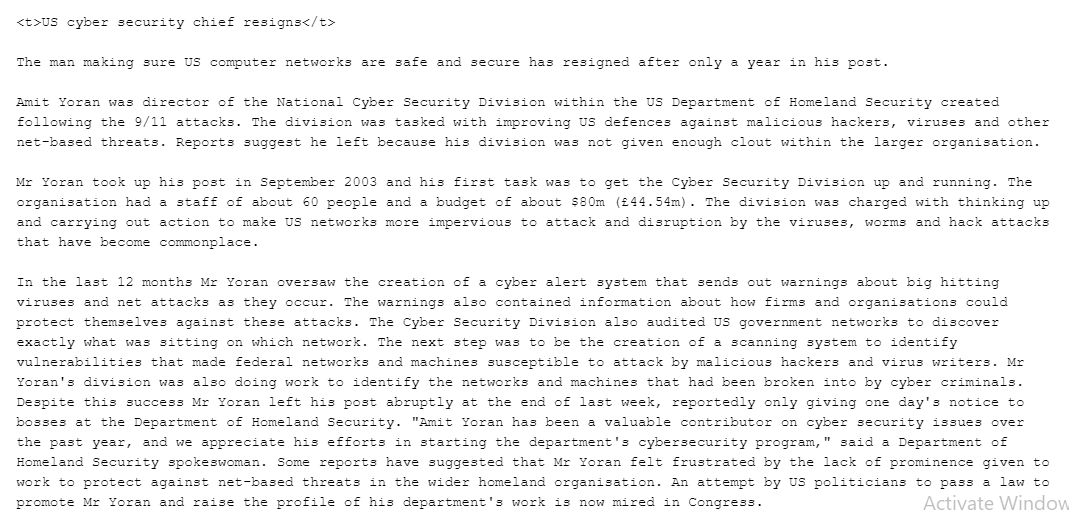